In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from tqdm.auto import tqdm

from multisoc.theory.fairness_metrics import analytical_1vRest_onedimensional_deltas,analytical_1vRest_multidimensional_deltas
from multisoc.generate.two_dimensional_population import consol_comp_pop_frac_tnsr,relative_correlation_inv
from multisoc.generate.utils import make_composite_index
from multisoc.theory.multidimensional_preferences import composite_H

from paper_plots import *

## Parameter grid to explore

In [4]:
fm2_lst = np.linspace(0.5,0,26)[:-1]
fm1_lst = np.linspace(0,.5,26)[1:]

rel_corr_list = np.linspace(-1,1,101)
h_list =np.linspace(0.01,.99,101)

## Load precomputed results to save time (a few hours)

In [2]:
## The computations take a few hours, this is a precomputed dataset
!pip install gdown

#collapse-output
import gdown

url = 'https://drive.google.com/file/d/1Yh-OjLj91CvXy2uIDo3iyUpfB-xbYIOv/view?usp=sharing'
output_path = './temp/inequality_heatmaps_data.p'
gdown.download(url, output_path, quiet=False,fuzzy=True)

with open(f"temp/inequality_heatmaps_data.p","rb") as f:
    res_dct = pickle.load(f)

Downloading...
From (original): https://drive.google.com/uc?id=1Yh-OjLj91CvXy2uIDo3iyUpfB-xbYIOv
From (redirected): https://drive.google.com/uc?id=1Yh-OjLj91CvXy2uIDo3iyUpfB-xbYIOv&confirm=t&uuid=3e26726b-db9e-4977-a30b-b5b25723cac3
To: C:\Users\csh_samu\Documents\CSH\CSH\projects\multiple_attributes\python_GIT\intersectional_network_inequalities_paper\temp\inequality_heatmaps_data.p
100%|███████████████████████████████████████████████████████████████████████████████| 159M/159M [00:02<00:00, 61.5MB/s]


## Do computations [unnecessary if you load the precomputed data]

In [3]:
res_dct = {
    "f2m_lst": fm2_lst,
    "fm1_lst": fm1_lst,
    "minority_1": [],
    "minority_2": [],
    "multi_(0, 0)": [],
    "multi_(0, 1)": [],
    "multi_(1, 0)": [],
    "multi_(1, 1)": []
}

for plti, f2m in enumerate(fm2_lst):
    print (f2m,"\n***********************************************")
    for pltj, f1m in enumerate(fm1_lst):
        print (f1m)
        if f2m<0.999999*f1m: ## To fix some numerical issues where when f2m==f1m it wouldn't plot bc of roundoff error
            continue

        region_lbl = identify_region(f1m,f2m)
        
        N = 500
        
        marginal_distributions = [[f1m,1-f1m],[f2m,1-f2m]]
        
        res_dct_i = {
                "minority_1": np.zeros((len(rel_corr_list),len(h_list))) + np.nan,
                "minority_2": np.zeros((len(rel_corr_list),len(h_list))) + np.nan,
                "multi_(0, 0)": np.zeros((len(rel_corr_list),len(h_list))) + np.nan,
                "multi_(0, 1)": np.zeros((len(rel_corr_list),len(h_list))) + np.nan,
                "multi_(1, 0)": np.zeros((len(rel_corr_list),len(h_list))) + np.nan,
                "multi_(1, 1)": np.zeros((len(rel_corr_list),len(h_list))) + np.nan
            }
        
        for i, rel_corr_i in tqdm(enumerate(rel_corr_list)):
            corr_i = relative_correlation_inv(f2m,rel_corr_i)
            ## Compute population distribution
            ## Multidimensional population distribution
            F = consol_comp_pop_frac_tnsr(marginal_distributions,corr_i)
            comp_indices = make_composite_index(F.shape)
            
            for j, h_i in enumerate(h_list):
                ## Build H matrix
                h_mtrx_lst = [
                    np.array([
                        [h_i, 1-h_i],
                        [1-h_i, h_i]]),
                    np.array([
                        [h_i, 1-h_i],
                        [1-h_i, h_i]])
                             ]
        
                H_theor = composite_H(
                        h_mtrx_lst,
                        "all",
                        p_d = None,
                        alpha = None,
                        )
        
                ## Compute inequalities
                onedim_deltas_i = analytical_1vRest_onedimensional_deltas(H_theor,F,N)
                multidim_deltas_i = analytical_1vRest_multidimensional_deltas(H_theor,F,N)

                res_dct_i["minority_1"][i,j] =  onedim_deltas_i[0][0]
                res_dct_i["minority_2"][i,j] =  onedim_deltas_i[1][0]
                
                for r, delta in multidim_deltas_i.items():
                    res_dct_i["multi_"+str(r)][i,j] = delta

        res_dct["minority_2"].append(res_dct_i["minority_2"])
        res_dct["minority_1"].append(res_dct_i["minority_1"])
        
        for r in [(0,0),(0,1),(1,0),(1,1)]:
            res_dct["multi_"+str(r)].append(res_dct_i["multi_"+str(r)])

print ("saving...")

with open(f"temp/inequality_heatmaps_data.p","wb") as f:
    pickle.dump(res_dct,f)

0.5 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3


0it [00:00, ?it/s]

0.32


0it [00:00, ?it/s]

0.34


0it [00:00, ?it/s]

0.36


0it [00:00, ?it/s]

0.38


0it [00:00, ?it/s]

0.4


0it [00:00, ?it/s]

0.42


0it [00:00, ?it/s]

0.44


0it [00:00, ?it/s]

0.46


0it [00:00, ?it/s]

0.48


0it [00:00, ?it/s]

0.5


0it [00:00, ?it/s]

0.48 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3


0it [00:00, ?it/s]

0.32


0it [00:00, ?it/s]

0.34


0it [00:00, ?it/s]

0.36


0it [00:00, ?it/s]

0.38


0it [00:00, ?it/s]

0.4


0it [00:00, ?it/s]

0.42


0it [00:00, ?it/s]

0.44


0it [00:00, ?it/s]

0.46


0it [00:00, ?it/s]

0.48


0it [00:00, ?it/s]

0.5
0.46 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3


0it [00:00, ?it/s]

0.32


0it [00:00, ?it/s]

0.34


0it [00:00, ?it/s]

0.36


0it [00:00, ?it/s]

0.38


0it [00:00, ?it/s]

0.4


0it [00:00, ?it/s]

0.42


0it [00:00, ?it/s]

0.44


0it [00:00, ?it/s]

0.46


0it [00:00, ?it/s]

0.48
0.5
0.44 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3


0it [00:00, ?it/s]

0.32


0it [00:00, ?it/s]

0.34


0it [00:00, ?it/s]

0.36


0it [00:00, ?it/s]

0.38


0it [00:00, ?it/s]

0.4


0it [00:00, ?it/s]

0.42


0it [00:00, ?it/s]

0.44


0it [00:00, ?it/s]

0.46
0.48
0.5
0.42 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3


0it [00:00, ?it/s]

0.32


0it [00:00, ?it/s]

0.34


0it [00:00, ?it/s]

0.36


0it [00:00, ?it/s]

0.38


0it [00:00, ?it/s]

0.4


0it [00:00, ?it/s]

0.42


0it [00:00, ?it/s]

0.44
0.46
0.48
0.5
0.4 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3


0it [00:00, ?it/s]

0.32


0it [00:00, ?it/s]

0.34


0it [00:00, ?it/s]

0.36


0it [00:00, ?it/s]

0.38


0it [00:00, ?it/s]

0.4


0it [00:00, ?it/s]

0.42
0.44
0.46
0.48
0.5
0.38 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3


0it [00:00, ?it/s]

0.32


0it [00:00, ?it/s]

0.34


0it [00:00, ?it/s]

0.36


0it [00:00, ?it/s]

0.38


0it [00:00, ?it/s]

0.4
0.42
0.44
0.46
0.48
0.5
0.36 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3


0it [00:00, ?it/s]

0.32


0it [00:00, ?it/s]

0.34


0it [00:00, ?it/s]

0.36


0it [00:00, ?it/s]

0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.33999999999999997 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3


0it [00:00, ?it/s]

0.32


0it [00:00, ?it/s]

0.34


0it [00:00, ?it/s]

0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.32 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3


0it [00:00, ?it/s]

0.32


0it [00:00, ?it/s]

0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.3 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3


0it [00:00, ?it/s]

0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.28 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28


0it [00:00, ?it/s]

0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.26 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26


0it [00:00, ?it/s]

0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.24 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24


0it [00:00, ?it/s]

0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.21999999999999997 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22


0it [00:00, ?it/s]

0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.2 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2


0it [00:00, ?it/s]

0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.18 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18


0it [00:00, ?it/s]

0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.15999999999999998 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16


0it [00:00, ?it/s]

0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.14 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14


0it [00:00, ?it/s]

0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.12 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12


0it [00:00, ?it/s]

0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.09999999999999998 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1


0it [00:00, ?it/s]

0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.08000000000000002 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08


0it [00:00, ?it/s]

0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.06 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06


0it [00:00, ?it/s]

0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.03999999999999998 
***********************************************
0.02


0it [00:00, ?it/s]

0.04


0it [00:00, ?it/s]

0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.020000000000000018 
***********************************************
0.02


0it [00:00, ?it/s]

0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
saving...


## Plot results

In [5]:
plt.ioff()

fm2_lst = res_dct["f2m_lst"]
fm1_lst =res_dct["fm1_lst"]

fig_ax_dct = {
    "minority_1": plt.subplots(len(fm2_lst), len(fm1_lst), figsize=(20,20), gridspec_kw={"wspace":0.01,"hspace":0.01}),
    "minority_2": plt.subplots(len(fm2_lst), len(fm1_lst), figsize=(20,20), gridspec_kw={"wspace":0.01,"hspace":0.01}),
    "multi_(0, 0)": plt.subplots(len(fm2_lst), len(fm1_lst), figsize=(20,20), gridspec_kw={"wspace":0.01,"hspace":0.01}),
    "multi_(0, 1)": plt.subplots(len(fm2_lst), len(fm1_lst), figsize=(20,20), gridspec_kw={"wspace":0.01,"hspace":0.01}),
    "multi_(1, 0)": plt.subplots(len(fm2_lst), len(fm1_lst), figsize=(20,20), gridspec_kw={"wspace":0.01,"hspace":0.01}),
    "multi_(1, 1)": plt.subplots(len(fm2_lst), len(fm1_lst), figsize=(20,20), gridspec_kw={"wspace":0.01,"hspace":0.01})
}

plot_number = 0
for plti, f2m in enumerate(fm2_lst):
    print (f2m,"\n***********************************************")
    for pltj, f1m in enumerate(fm1_lst):
        print (f1m)
        if f2m<0.999999*f1m: ## To fix some numerical issues where when f2m==f1m it wouldn't plot bc of roundoff error
            
            axs_current = fig_ax_dct["minority_1"][1]
            plt.sca(axs_current[plti,pltj])
            axs_current[plti,pltj].spines[["left","right","top","bottom"]].set_visible(False)
            plt.xticks([],[])
            plt.yticks([],[])
            axs_current = fig_ax_dct["minority_2"][1]
            plt.sca(axs_current[plti,pltj])
            axs_current[plti,pltj].spines[["left","right","top","bottom"]].set_visible(False)
            plt.xticks([],[])
            plt.yticks([],[])
            for r in [(0,0),(0,1),(1,0),(1,1)]:
                axs_current = fig_ax_dct["multi_"+str(r)][1]
                plt.sca(axs_current[plti,pltj])
                axs_current[plti,pltj].spines[["left","right","top","bottom"]].set_visible(False)
                plt.xticks([],[])
                plt.yticks([],[])

            continue

        region_lbl = identify_region(f1m,f2m)
        
        plt.figure(fig_ax_dct["minority_1"][0])
        # plt.suptitle("min1")
        axs_current = fig_ax_dct["minority_1"][1]

        plot_one_axes(axs_current[plti,pltj],res_dct["minority_1"][plot_number],region_lbl,h_list,rel_corr_list)

        if plti == 0:
            plt.title(f"{f1m:.02f}")
        if pltj == 0:
            plt.ylabel(f"{f2m:.02f}")
        if pltj == 0 and plti == len(fm2_lst)-1:
            plt.xticks([0,0.5,1],[0,0.5,1])
            plt.yticks([-1,0,1],[-1,0,1])

        plt.figure(fig_ax_dct["minority_2"][0])
        # plt.suptitle("min2")
        axs_current = fig_ax_dct["minority_2"][1]
        plot_one_axes(axs_current[plti,pltj],res_dct["minority_2"][plot_number],region_lbl,h_list,rel_corr_list)

        if plti == 0:
            plt.title(f"{f1m:.02f}")
        if pltj == 0:
            plt.ylabel(f"{f2m:.02f}")
        if pltj == 0 and plti == len(fm2_lst)-1:
            plt.xticks([0,0.5,1],[0,0.5,1])
            plt.yticks([-1,0,1],[-1,0,1])
        
        for r in [(0,0),(0,1),(1,0),(1,1)]:
            plt.figure(fig_ax_dct["multi_"+str(r)][0])
            # plt.suptitle(str(r))
            axs_current = fig_ax_dct["multi_"+str(r)][1]
            plot_one_axes(axs_current[plti,pltj],res_dct["multi_"+str(r)][plot_number],region_lbl,h_list,rel_corr_list)

            if plti == 0:
                plt.title(f"{f1m:.02f}")
            if pltj == 0:
                plt.ylabel(f"{f2m:.02f}")
            if pltj == 0 and plti == len(fm2_lst)-1:
                plt.xticks([0,0.5,1],[0,0.5,1])
                plt.yticks([-1,0,1],[-1,0,1])
        
        plot_number += 1 

        # plt.show()
print ("saving...")

for k,v in fig_ax_dct.items():
    fig, axs = v
    fig.savefig(f"temp/{k}_heatmaps.png",dpi=600,)

plt.ion()

0.5 
***********************************************
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.48 
***********************************************
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.46 
***********************************************
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.44 
***********************************************
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.42 
***********************************************
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.4 
***********************************************
0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0

## Plot one colormap 

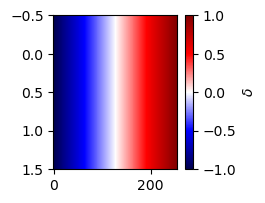

In [7]:
plt.close("all")
plt.figure(figsize=(2,2))

gradient = np.linspace(-1, 1, 256)
gradient = np.vstack((gradient, gradient))

plt.imshow(gradient, aspect='auto', cmap="seismic")
plt.colorbar(label=r"$\delta$")

plt.savefig(f"temp/colormap_heatmaps.svg",transparent=True)